## Introduction
This code is for fitting the random gaussian data by gaussian function. In gaussian function, we have 3 parameter to control the function:
\begin{align}
f(x ; A,\mu, \sigma) = Ae^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
\end{align}
Then, we can use the obersved gaussian data to fit the gaussian function, in orde to find out the $\mu, A, \sigma$

## Original Example: CERN ROOT program  
https://github.com/root-project/training/blob/master/BasicCourse/Exercises/ROOTBooks/GausFit_Solution.ipynb

Instead of using ROOT library, we use the common python library and Bayesian Analysis to find out the parameters 

In [1]:
%matplotlib inline 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymc3 import * 

sns.set_style("darkgrid")

In [2]:
# Use seed to force the random numbers produced each time are the same
np.random.seed(45673)

In [3]:
# generate an array of random number drawed from normal distribution with mean=1, sd=2
x = np.random.normal(1,2,1000)

In [4]:
x.mean(), x.std()

(0.9931811186689571, 2.0608784793214876)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  8.,  5.,  8.,  7., 22., 23., 28., 46., 45., 40., 71., 82.,
        80., 76., 79., 77., 60., 52., 33., 46., 39., 30., 15.,  5.,  9.,
         3.,  2.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]),
 array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
         -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
         -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
          0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
          4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
          8. ,   8.4,   8.8,   9.2,   9.6,  10. ]),
 <a list of 1 Patch objects>)

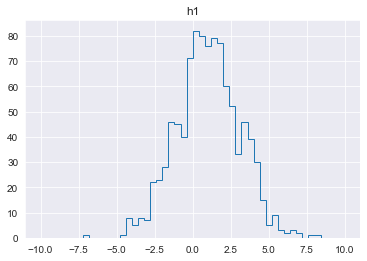

In [5]:
plt.title("h1")
plt.hist(x,bins=50,range=[-10,10],histtype= "step")

## Extract the data from histogram

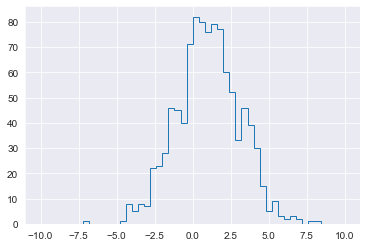

In [6]:
counts,bins,patches= plt.hist(x,bins=50,range=[-10,10],histtype= "step")


In [7]:
# counts in each set of bin
counts , len(counts)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  8.,  5.,  8.,  7., 22., 23., 28., 46., 45., 40., 71., 82.,
        80., 76., 79., 77., 60., 52., 33., 46., 39., 30., 15.,  5.,  9.,
         3.,  2.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]), 50)

In [8]:
# bins the numer of retangles in range [-10,-9.6), [9.6, -9.2)......[9.6, 10)
# Caution: number of counts is not equal to number of bins 
bins, len(bins)

(array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
         -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
         -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
          0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
          4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
          8. ,   8.4,   8.8,   9.2,   9.6,  10. ]), 51)

In [9]:
# Partition of range[-10,10] with bins = 50
# instad of using bins, we used this array as its dimenions is as same as count
np.linspace(-10,10,50), len(np.linspace(-10,10,50))

(array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
         -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
         -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
         -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
         -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
         -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
         -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
          1.42857143,   1.83673469,   2.24489796,   2.65306122,
          3.06122449,   3.46938776,   3.87755102,   4.28571429,
          4.69387755,   5.10204082,   5.51020408,   5.91836735,
          6.32653061,   6.73469388,   7.14285714,   7.55102041,
          7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
          9.59183673,  10.        ]), 50)

In [10]:
patches[0]

In [11]:
# define y as counts 
y = counts

In [12]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  8.,  5.,  8.,  7., 22., 23., 28., 46., 45., 40., 71., 82.,
       80., 76., 79., 77., 60., 52., 33., 46., 39., 30., 15.,  5.,  9.,
        3.,  2.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.])

In [13]:
# define x_data = bins
x_data = np.linspace(-10,10,50)

## Use Pymc3 to build our model : priors and likelihood

Suppose we do not know the exact values of the mean and standard deviation of the data set. We assume the distribution of $A, \sigma, \mu$ are uniform. Then, we can build a model using Pymc3 to estimate these parameters.

Bayes Rule 

\begin{align}
P(model|data) = P(data|model)\times \frac{P(model)}{P(data)}
\end{align}

P(model|data) = Posterior ; P(data|model) = Likelihood ; P(model) = Prior ; P(data) = Evidence. Usually when we are doing parameter estimation, we ignore the evidence P(data).

In [14]:
with Model() as our_model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = Uniform("sigma",0,10)
    A = Uniform("Amp", 0, 100)
    m =  Uniform("mean", 0, 5)
    sd =  Uniform("std", 0, 5)
    # Define likelihood
    likelihood = Normal('y',A*np.e**(-0.5*((x_data-m)/sd)**2),
                        sigma=sigma, observed=y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std, mean, Amp, sigma]
Sampling 4 chains, 0 divergences: 100%|██████████| 14000/14000 [00:11<00:00, 1171.18draws/s]
/Users/pangkachun/Library/Python/3.7/lib/python/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


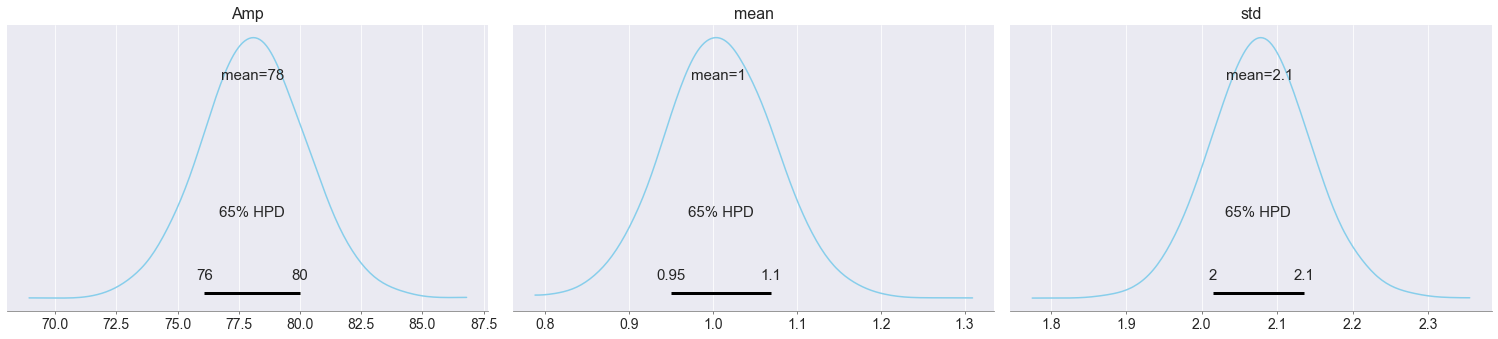

In [15]:
with our_model:
    trace_our_model = sample(2000, tune=1500,cores=4)
    plot_posterior(trace_our_model,varnames=['Amp','mean','std'], color='#87ceeb' ,credible_interval=0.65)

/Users/pangkachun/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/pangkachun/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/pangkachun/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/pangkachun/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not ef

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a8265f8>,
      dtype=object)

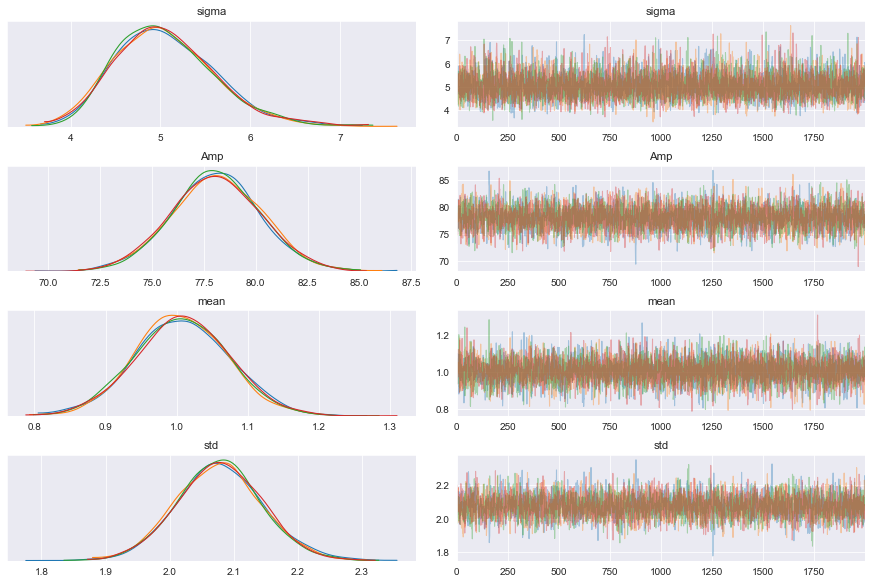

In [16]:
import arviz as az
az.plot_trace(trace_our_model)

In [17]:
# Results 
res = summary(trace_our_model)
res

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
sigma,5.056,0.556,4.060,6.107,0.007,0.005,5735.0,5439.0,6185.0,4755.0,1.0
Amp,78.074,2.123,74.191,82.153,0.032,0.022,4526.0,4509.0,4550.0,4672.0,1.0
mean,1.006,0.065,0.888,1.133,0.001,0.001,6314.0,6314.0,6294.0,5300.0,1.0
std,2.077,0.066,1.953,2.202,0.001,0.001,4415.0,4410.0,4436.0,5051.0,1.0


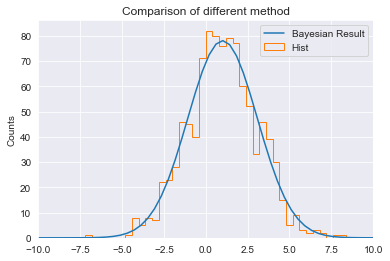

In [18]:
plt.figure(1)
plt.title("Comparison of different method")
plt.plot(x_data, 78.074*np.e**(-0.5*((x_data-1.006)/2.077)**2),label="Bayesian Result")
plt.hist(x,bins=50,range=[-10,10],histtype= "step",label="Hist")
plt.ylabel("Counts")
plt.xlim(-10,10)
plt.legend()